# Module 5 - Modern Portfolio Theory

#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

### Query 5.1 
5.1 For your chosen stock, calculate the mean daily return and daily standard deviation of returns, and then just annualise them to get mean expected annual return and volatility of that single stock. **( annual mean = daily mean * 252 , annual stdev = daily stdev * sqrt(252) )**

In [100]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

In [65]:
data = pd.read_csv('VOLTAS.csv')
data.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,VOLTAS,EQ,15-May-2017,433.55,436.00,436.4,430.10,433.40,431.85,432.15,696583,3.010253e+08,14160,327583,47.03
1,VOLTAS,EQ,16-May-2017,431.85,432.00,438.2,430.70,433.00,432.45,433.46,996780,4.320614e+08,19456,366664,36.78
2,VOLTAS,EQ,17-May-2017,432.45,435.00,435.0,427.25,430.85,430.20,429.93,686830,2.952867e+08,11494,307390,44.75
3,VOLTAS,EQ,18-May-2017,430.20,425.10,427.0,412.70,414.50,414.10,418.14,1231618,5.149912e+08,18700,571822,46.43
4,VOLTAS,EQ,19-May-2017,414.10,414.35,419.9,410.95,416.00,415.75,414.98,869457,3.608041e+08,29631,313872,36.10


In [66]:
data['Daily Return'] = data['Close Price'].pct_change()
data['Daily Return'] = data['Daily Return'].replace([np.inf, -np.inf], np.nan)
data = data.dropna().reset_index(drop = True)
mean_daily_return = data['Daily Return'].mean() 
print("Mean Daily return is :",mean_daily_return)
daily_standard_return = data['Daily Return'].std()
print('Daily Standard Deviation of return is :',daily_standard_return)
# Expected Annual Return
annual_mean = mean_daily_return * 252
# Volatility
annual_stdev = daily_standard_return * math.sqrt(252)
print("Annual mean is : ",annual_mean)
print("Annual Standard Deviation is :",annual_stdev)

Mean Daily return is : 0.0007580562036287222
Daily Standard Deviation of return is : 0.01942400288315044
Annual mean is :  0.19103016331443798
Annual Standard Deviation is : 0.308346486565306


QUERY 5.2

In [89]:
itc_data = pd.read_csv('ITC.csv')
sun_data = pd.read_csv('SUNPHARMA.csv')
lt_data  = pd.read_csv('LT.csv')
rel_data = pd.read_csv('RELINFRA.csv')
cas_data = pd.read_csv('CASTROLIND.csv')

dataset['ITC'] = pd.DataFrame(itc_data['Close Price'])
dataset['SUNPHARMA'] = pd.DataFrame(sun_data['Close Price'])
dataset['LT'] = pd.DataFrame(lt_data['Close Price'])
dataset['RELINFRA'] = pd.DataFrame(rel_data['Close Price'])
dataset['CASTROLIND'] = pd.DataFrame(cas_data['Close Price'])
print("Closing Prices of the 5 respective stocks")
dataset.head()

Closing Prices of the 5 respective stocks


,ITC,SUNPHARMA,LT,RELINFRA,CASTROLIND
0,277.95,654.45,1742.40,605.40,449.85
1,283.45,652.35,1740.70,611.05,443.00
2,281.65,650.90,1755.45,605.25,439.55
3,277.90,653.95,1722.60,578.65,433.95
4,286.20,653.15,1724.55,569.55,437.10


QUERY 5.3

In [98]:
returns = dataset.astype(float).pct_change()
mean_daily_returns = returns.mean()
mean_daily_returns = mean_daily_returns.values.reshape(5,1)
cov_matrix = returns.cov() # Covarince between the 5 Assests of the portfolio
weights = np.asarray([0.2,0.2,0.2,0.2,0.2]) # Weights of repective stocks/assests
portfolio_return = round(np.sum(mean_daily_returns * weights) * 252,2)
portfolio_std_dev = round(np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252),2)
print('Portfolio expected annualised return is :',portfolio_return)
print('Portfolio volatility is :',portfolio_std_dev)

Portfolio expected annualised return is : -1.14
Portfolio volatility is : 0.19


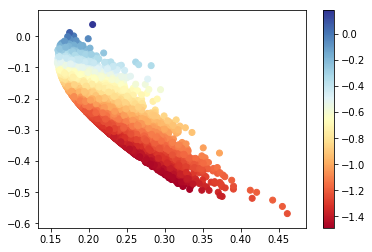

In [103]:
returns = dataset.astype(float).pct_change()
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 25000

#set up array to hold results
results = np.zeros((3,num_portfolios))
for i in range(num_portfolios):
    weights = np.random.random(5)
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    

    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]    
#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe'])

results_frame
#create scatter plot coloured by Sharpe Ratio
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.colorbar()

QUERY 5.4

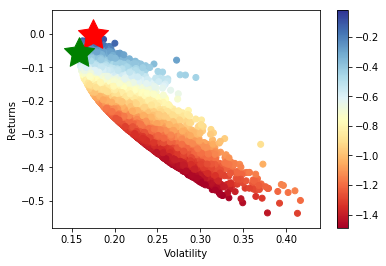

In [105]:
stocks = ['ITC','SUNPHARMA','LT','RELINFRA','CASTROLIND']

returns = dataset.astype(float).pct_change()
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()

num_portfolios = 25000

#set up array to hold results
#We have increased the size of the array to hold the weight values for each stock
results = np.zeros((4+len(stocks)-1,num_portfolios))
for i in range(num_portfolios):
    weights = np.random.random(5)
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    

    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]  
     #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[j+3,i] = weights[j]
#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe',stocks[0],stocks[1],stocks[2],stocks[3],stocks[4]])

#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]

#create scatter plot coloured by Sharpe Ratio
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=1000)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=1000)